<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#LGBM-training" data-toc-modified-id="LGBM-training-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>LGBM training</a></span><ul class="toc-item"><li><span><a href="#Prepare" data-toc-modified-id="Prepare-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Prepare</a></span></li><li><span><a href="#Core" data-toc-modified-id="Core-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Core</a></span></li><li><span><a href="#Feature-importances" data-toc-modified-id="Feature-importances-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Feature importances</a></span></li></ul></li></ul></div>

In [ ]:
import taiko as tk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm
import lightgbm as lgb

SONG = 1
WHO = 4
TRAIN_ORDER = 3

Using TensorFlow backend.


In [2]:
pfs = []
for drummer in range(WHO, WHO + 1):
    ppf = []
    for order_id in tqdm(range(1, 3 + 1)):
        ppf.append(tk.get_performance(drummer, SONG, order_id).event_primitive_df)
    pfs.append(ppf)

100%|██████████| 3/3 [00:59<00:00, 20.00s/it]


In [3]:
train_df = pfs[0][2]
train_df

,hit_type,R_AAI,R_AVI,R_ASMA,R_GAI,R_GVI,R_GSMA,R_AAE,R_ARE,R_MAMI,...,L_AXYCORR,L_AYZCORR,L_AZXCORR,L_GXYCORR,L_GYZCORR,L_GZXCORR,L1,L2,R1,R2
0,1,0.043879,0.000116,0.064125,19.759177,52.758014,31.789917,0.002042,443.183073,0.040263,...,-0.136233,-0.845421,-0.293457,0.351156,0.462784,0.904649,0,0,0,0
1,0,0.178229,0.009427,0.278250,26.395620,135.992134,39.184306,0.041192,832.720874,0.134622,...,-0.437305,0.860353,-0.332148,-0.327146,0.445590,-0.561307,1,0,0,0
2,0,0.039392,0.000725,0.057958,25.754165,81.538172,43.175375,0.002277,744.815187,0.030177,...,-0.565376,-0.324446,-0.366097,-0.448841,0.955151,-0.690833,0,1,0,1
3,0,0.059595,0.000198,0.096423,22.115295,99.991140,35.511115,0.003750,589.077420,0.054509,...,-0.354889,-0.726165,0.415920,-0.614919,0.811196,-0.862909,0,0,1,0
4,1,0.059342,0.000243,0.091986,24.774176,101.739699,38.335833,0.003765,715.499517,0.056465,...,0.354067,-0.774158,-0.604982,-0.598949,-0.425929,0.827461,0,0,0,0
5,0,0.172984,0.010045,0.247667,32.603436,181.067433,46.503458,0.039969,1244.051475,0.133875,...,-0.392732,-0.000017,0.734159,-0.819209,0.971580,-0.784074,1,0,0,0
6,0,0.037594,0.000541,0.057014,27.761522,102.360709,44.620861,0.001955,873.062814,0.030741,...,-0.086453,-0.302946,0.717756,-0.600545,0.175152,-0.580013,0,1,0,1
7,0,0.078807,0.000876,0.120861,28.574028,148.370769,46.052431,0.007086,964.845871,0.079123,...,-0.506474,-0.703345,0.698653,-0.769217,0.257649,-0.570410,0,0,1,0
8,1,0.056421,0.000304,0.085449,26.003231,199.155991,42.765577,0.003488,875.324031,0.063435,...,0.317288,-0.378588,-0.535189,-0.214935,0.212720,0.744981,0,0,0,1
9,0,0.195392,0.008625,0.297250,46.898008,241.135684,69.624083,0.046803,2440.558847,0.169561,...,-0.273747,-0.502404,0.910968,-0.846342,0.492934,-0.370510,1,0,1,0


# LGBM training

## Prepare

In [4]:
x = train_df.drop(['hit_type'], axis=1)
y = train_df['hit_type']


x_valid_1 = pfs[0][0].drop(['hit_type'], axis=1)
y_valid_1 = pfs[0][0]['hit_type']

x_valid_2 = pfs[0][1].drop(['hit_type'], axis=1)
y_valid_2 = pfs[0][1]['hit_type']

x_test_1 = x_valid_1.copy()
x_test_2 = x_valid_2.copy()

train_df

,hit_type,R_AAI,R_AVI,R_ASMA,R_GAI,R_GVI,R_GSMA,R_AAE,R_ARE,R_MAMI,...,L_AXYCORR,L_AYZCORR,L_AZXCORR,L_GXYCORR,L_GYZCORR,L_GZXCORR,L1,L2,R1,R2
0,1,0.043879,0.000116,0.064125,19.759177,52.758014,31.789917,0.002042,443.183073,0.040263,...,-0.136233,-0.845421,-0.293457,0.351156,0.462784,0.904649,0,0,0,0
1,0,0.178229,0.009427,0.278250,26.395620,135.992134,39.184306,0.041192,832.720874,0.134622,...,-0.437305,0.860353,-0.332148,-0.327146,0.445590,-0.561307,1,0,0,0
2,0,0.039392,0.000725,0.057958,25.754165,81.538172,43.175375,0.002277,744.815187,0.030177,...,-0.565376,-0.324446,-0.366097,-0.448841,0.955151,-0.690833,0,1,0,1
3,0,0.059595,0.000198,0.096423,22.115295,99.991140,35.511115,0.003750,589.077420,0.054509,...,-0.354889,-0.726165,0.415920,-0.614919,0.811196,-0.862909,0,0,1,0
4,1,0.059342,0.000243,0.091986,24.774176,101.739699,38.335833,0.003765,715.499517,0.056465,...,0.354067,-0.774158,-0.604982,-0.598949,-0.425929,0.827461,0,0,0,0
5,0,0.172984,0.010045,0.247667,32.603436,181.067433,46.503458,0.039969,1244.051475,0.133875,...,-0.392732,-0.000017,0.734159,-0.819209,0.971580,-0.784074,1,0,0,0
6,0,0.037594,0.000541,0.057014,27.761522,102.360709,44.620861,0.001955,873.062814,0.030741,...,-0.086453,-0.302946,0.717756,-0.600545,0.175152,-0.580013,0,1,0,1
7,0,0.078807,0.000876,0.120861,28.574028,148.370769,46.052431,0.007086,964.845871,0.079123,...,-0.506474,-0.703345,0.698653,-0.769217,0.257649,-0.570410,0,0,1,0
8,1,0.056421,0.000304,0.085449,26.003231,199.155991,42.765577,0.003488,875.324031,0.063435,...,0.317288,-0.378588,-0.535189,-0.214935,0.212720,0.744981,0,0,0,1
9,0,0.195392,0.008625,0.297250,46.898008,241.135684,69.624083,0.046803,2440.558847,0.169561,...,-0.273747,-0.502404,0.910968,-0.846342,0.492934,-0.370510,1,0,1,0


## Core

In [5]:
train_set = lgb.Dataset(x, y)
valid_1_set = lgb.Dataset(x_valid_1, y_valid_1, free_raw_data=False)
valid_2_set = lgb.Dataset(x_valid_2, y_valid_2, free_raw_data=False)
watchlist = [valid_1_set]

params = dict({
    'learning_rate': 0.5,
    'application': 'multiclass',
    'num_classes': 3,
#     'min_data_in_leaf': 5,
#     'max_depth': 8,
    'num_leaves': 2 ** 3,
    'verbosity': 0,
    'metric': 'multi_error'
})

grid_params = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [8, 10],
}

model = lgb.train(params, train_set=train_set, valid_sets=watchlist, num_boost_round=200, verbose_eval=5, early_stopping_rounds=100)
# y_pred_1 = model.predict(x_test_1, num_iteration=model.best_iteration)
y_pred_2 = model.predict(x_test_2, num_iteration=model.best_iteration)

watchlist = [valid_2_set]
model = lgb.train(params, train_set=train_set, valid_sets=watchlist, num_boost_round=200, verbose_eval=5, early_stopping_rounds=100)
y_pred_1 = model.predict(x_test_1, num_iteration=model.best_iteration)

Training until validation scores don't improve for 100 rounds.
[5]	valid_0's multi_error: 0.210526
[10]	valid_0's multi_error: 0.177285
[15]	valid_0's multi_error: 0.160665
[20]	valid_0's multi_error: 0.171745
[25]	valid_0's multi_error: 0.135734
[30]	valid_0's multi_error: 0.141274
[35]	valid_0's multi_error: 0.141274
[40]	valid_0's multi_error: 0.152355
[45]	valid_0's multi_error: 0.152355
[50]	valid_0's multi_error: 0.149584
[55]	valid_0's multi_error: 0.144044
[60]	valid_0's multi_error: 0.149584
[65]	valid_0's multi_error: 0.144044
[70]	valid_0's multi_error: 0.144044
[75]	valid_0's multi_error: 0.146814
[80]	valid_0's multi_error: 0.149584
[85]	valid_0's multi_error: 0.146814
[90]	valid_0's multi_error: 0.152355
[95]	valid_0's multi_error: 0.152355
[100]	valid_0's multi_error: 0.152355
[105]	valid_0's multi_error: 0.152355
[110]	valid_0's multi_error: 0.155125
[115]	valid_0's multi_error: 0.152355
[120]	valid_0's multi_error: 0.152355
[125]	valid_0's multi_error: 0.155125
Early s

## Feature importances

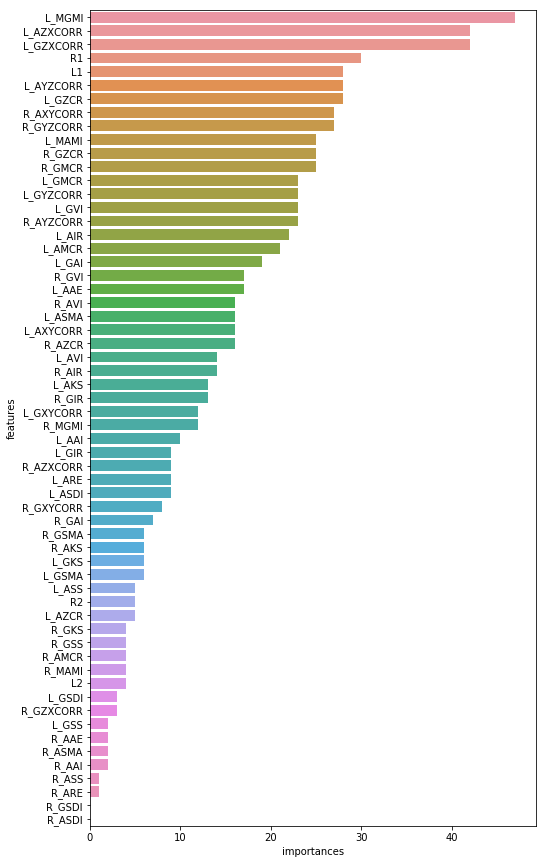

In [6]:
plot_df = pd.DataFrame({'features': train_df.columns[train_df.columns != 'hit_type'],
                        'importances': model.feature_importance()})
plot_df = plot_df.sort_values('importances', ascending=False)

plt.figure(figsize=(8, 15))
sns.barplot(x = plot_df.importances, y = plot_df.features)
plt.show()

In [7]:
y_test = []
for y_pred in [y_pred_1, y_pred_2]:
    predictions = []
    for x in y_pred:
        predictions.append(np.argmax(x))
    y_test.append(pd.Series(data=predictions))

In [8]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [9]:
def cutstom_output_cnf_matrix(y, pred_y):
    cnf_matrix = confusion_matrix(y, pred_y)
    
    # Plot normalized confusion matrix
    plt.figure(figsize=(10, 10))
    plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2], normalize=True,
                          title='Normalized confusion matrix')
    plt.show()

Normalized confusion matrix
[[0.91836735 0.07755102 0.00408163]
 [0.3255814  0.6744186  0.        ]
 [0.2        0.         0.8       ]]


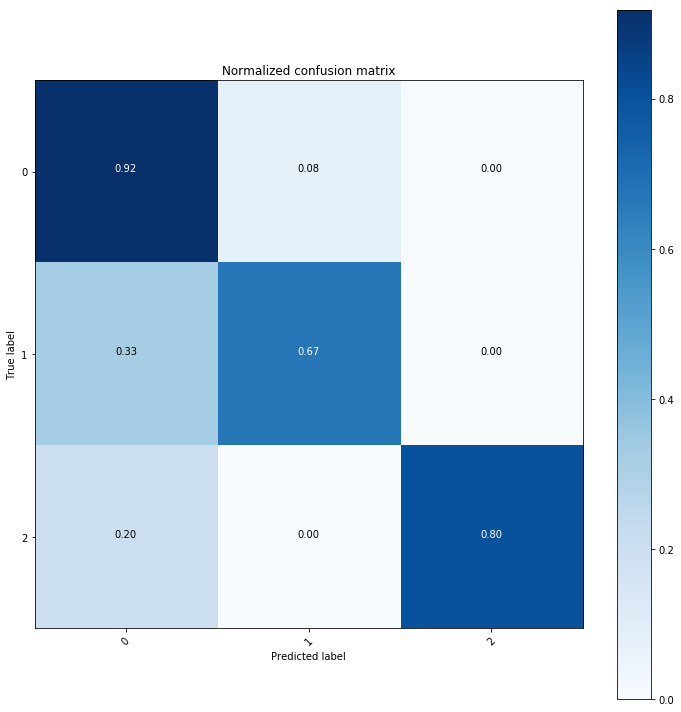

Normalized confusion matrix
[[0.96326531 0.02857143 0.00816327]
 [0.24418605 0.75581395 0.        ]
 [0.1        0.         0.9       ]]


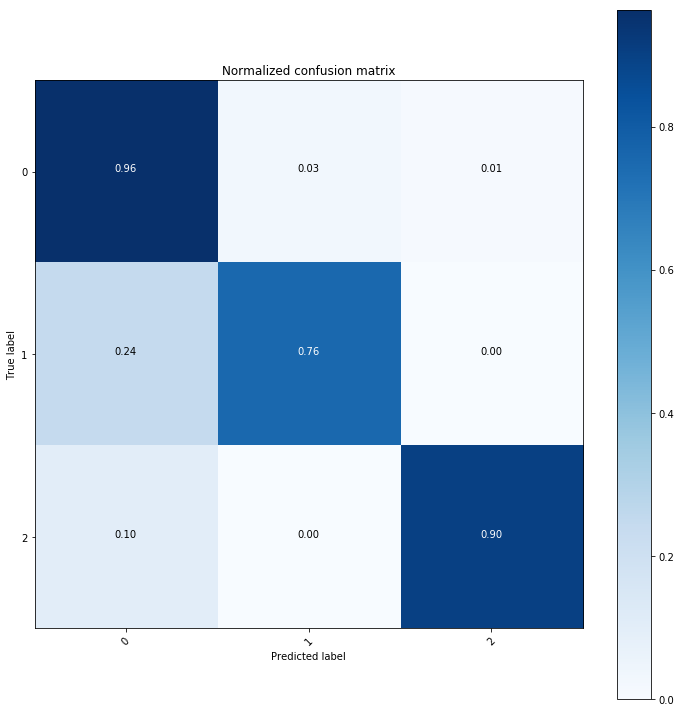

In [10]:
y_valid = [y_valid_1, y_valid_2]
for y_val, y_tst in zip(y_valid, y_test):
    cutstom_output_cnf_matrix(y_val, y_tst)